In [1]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 수치 미분

def derivative(f, var):
    if var.ndim==1:
        tmp_var=var
        
        delta=1e-5
        
        diff_value=np.zeros(var.shape)
        
        for index in range(len(var)):
            target=float(var[index])
            
            tmp_var[index]=target+delta        
            f1=f(tmp_var)
            
            tmp_var[index]=target-delta
            f2=f(tmp_var)
            
            diff_value[index]=(f1-f2)/2*delta
            
            tmp_var[index]=target
            
        return diff_value
    
    elif var.ndim==2:
        tmp_var=var
        
        delta=1e-5
        
        diff_value=np.zeros(np.shape)
        
        rows=var.shape[0]
        columns=var.shape[1]
        
        for row in range(rows):
            for column in range(columns):
                target=float(tmp_var[row, column])
                
                tmp_var[row, column]=target+delta
                f1=f(tmp_var)
                
                tmp_var[row, column]=target-delta
                f2=f(tmp_var)
                
                diff_value[row, column]=(f1-f2)/2*delta
                
                tmp_var[row, column]=target
                
        return diff_value
    

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [5]:
class MNIST_TEST:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.input_nodes=input_nodes
        self.hidden_nodes=hidden_nodes
        self.output_nodes=output_nodes
        
        self.W2=np.random.randn(self.input_nodes, self.hidden_nodes)/np.sqrt(self.input_nodes/2)
        self.b2=np.random.rand(self.hidden_nodes)
        
        self.W3 = np.random.randn(self.hidden_nodes, self.output_nodes) / np.sqrt(self.hidden_nodes/2)
        self.b3 = np.random.rand(self.output_nodes)
        
        self.learning_rate=learning_rate
        
        print("MNIST TEST object is created")
        
    def feed_forward(self):
        delta=1e-7
        
        z2=np.dot(self.input_data, self.W2)+self.b2
        a2=sigmoid(z2)
        
        z3=np.dot(a2, self.W3)+self.b3
        y=a3=sigmoid(z3)
        
        return -np.sum(self.target_data*np.log(y+delta)+(1-self.target_data)*np.log((1-y)+delta))
    
    def get_W_b(self):
        return self.W2, self.b2, self.W3, self.b3
    
    def loss_val(self):
        delta=1e-7
        
        z2=np.dot(self.input_data, self.W2)+self.b2
        a2=sigmoid(z2)
        
        z3=np.dot(a2, self.W3)+self.b3
        y=a3=sigmoid(z3)
        
        return  -np.sum( self.target_data*np.log(y + delta) + (1-self.target_data)*np.log((1 - y)+delta ) )
        
    def predict(self, input_data):
        z2=np.dot(self.input_data, self.W2)+self.b2
        a2=sigmoid(z2)
        
        z3=np.dot(a2, self.W3)+self.b3
        y=a3=sigmoid(z3)
        
        predict_num=np.argmax(y)
        
        return predict_num
    
    def accuracy(self, input_data, target_data):
        matched_list=[]
        not_matched_list=[]
        
        index_label_prediction_list=[]
        
        tmp_list=[]
        
        for index in range(len(input_data)):
            label=int(target_data[index])
            
            data=(input_data[index, :]/ 255.0 * 0.99) + 0.01
            
            predict_num=self.predict(data)
            
            if label==predict_num:
                matched_list.append(index)
            else:
                not_matched_list.append(index)
                
                tmp_list.append(index)
                tmp_list.append(lable)
                tmp_list.append(predict_num)
                
                index_label_prediction_list.append(tmp_list)
                
                tmp_list=[]
                
        print("current accuracy =", len(matched_list)/(len(input_data)))

        return matched_list, not_matched_list, index_label_prediction_list
    
    
    def train(self, input_data, target_data):
        self.input_data=input_data
        self.target_data=target_data
        
        f=lambda x: self.feed_forward()
        
        self.W2-=self.learning_rate * derivative(f, self.W2)
        self.b2-=self.learning_rate * derivative(f, self.b2)
        
        self.W3-=self.learning_rate * derivative(f, self.W3)
        self.b3-=self.learning_rate * derivative(f, self.b3)

In [ ]:
training_data = np.loadtxt('./mnist_train.csv', delimiter=',', dtype=np.float32)

print("training_data.shape = ", training_data.shape)

In [ ]:
#hyper-parameter
i_nodes = training_data.shape[1] - 1    # input nodes 개수
h1_nodes = 30  # hidden nodes 개수. 
o_nodes = 10    # output nodes 개수
lr = 1e-2      # learning rate
epochs = 1   # 반복횟수

# 손실함수 값을 저장할 list 생성
loss_val_list = []

# MNIST_Test 객체 생성
obj = MNIST_Test(i_nodes, h1_nodes, o_nodes, lr)

print("Neural Network Learning using Numerical Derivative...")

start_time = datetime.now()

for step in range(epochs):
    
    for index in range(len(training_data)):    
                
        # input_data, target_data normalize    
        input_data = ((training_data[index, 1:] / 255.0) * 0.99) + 0.01
        
        target_data = np.zeros(o_nodes) + 0.01    
        target_data[int(training_data[index, 0])] = 0.99
        
        obj.train(input_data, target_data)
        
        if (index % 200 == 0):
            print("epochs = ", step, ", index = ", index, ", loss value = ", obj.loss_val())
            
        # 손실함수 값 저장
        loss_val_list.append(obj.loss_val())        

end_time = datetime.now()
        
print("")
print("Elapsed Time => ", end_time - start_time)

In [ ]:
test_data = np.loadtxt('./mnist_test.csv', delimiter=',', dtype=np.float32)
print("test_data.shape = ", test_data.shape)

test_input_data = test_data[ :, 1: ]
test_target_data = test_data[ :, 0 ]

(true_list_1, false_list_1, index_label_prediction_list) = obj.accuracy(test_input_data, test_target_data) 

In [ ]:
# 손실함수 추세 확인
x_data_list = [ index for index in range(len(training_data)) ]
Y_DATA_LIST = []

for index in range(0, len(loss_val_list), 500):
    Y_DATA_LIST.append(loss_val_list[index])
    
plt.title('MNIST Loss Value Trend')
plt.xlabel('data index ( X 500)')
plt.ylabel('loss value')
plt.grid()
#plt.ylim(2.1, 7.1)
#plt.plot(x_data_list, loss_val_list, color='b')
plt.plot(Y_DATA_LIST, color='b')
plt.show()

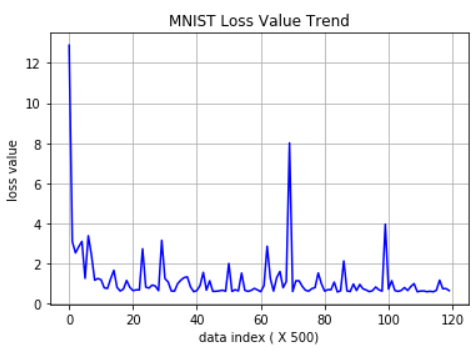